# 補間

- ラグランジュ補間
- ニュートン補間

In [46]:
# display graph on notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [84]:
df = pd.DataFrame(
    data = [
        [0.0, 0.8], [1.0, 3.1], [3.0, 4.5], [6.0, 3.9], [7.0, 2.8]
    ],
    columns = ['x', 'y']
)
df

,x,y
0,0.0,0.8
1,1.0,3.1
2,3.0,4.5
3,6.0,3.9
4,7.0,2.8


,x,y
0,0.0,0.800000
1,0.5,2.152741
2,1.0,3.100000
3,1.5,3.735737
4,2.0,4.139683
5,2.5,4.377344
6,3.0,4.500000
7,3.5,4.544705
8,4.0,4.534286
9,4.5,4.477344


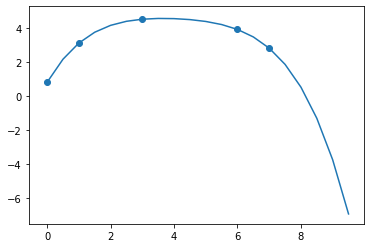

In [85]:
class LagrangeInterpolation:
    def __init__(self, df):
        self.x_list = df['x']
        self.y_list = df['y']

    def get_value(self, x):
        result = 0
        for iy in range(len(self.y_list)):
            a = 1
            for ix in range(len(self.x_list)):
                if ix != iy:
                    a *= (x - self.x_list[ix]) / (self.x_list[iy] - self.x_list[ix])
            result += a * self.y_list[iy]
        return result

lagrange = LagrangeInterpolation(df.copy())

data_lagrange = []
for x in np.arange(0, 10, 0.5):
    data_lagrange.append([x, lagrange.get_value(x)])
df_lagrange = pd.DataFrame(data=data_lagrange, columns=['x', 'y'])
plt.plot(df_lagrange['x'], df_lagrange['y'])
plt.scatter(df['x'], df['y'])
df_lagrange

,x,y
0,0.0,0.800000
1,0.5,2.152741
2,1.0,3.100000
3,1.5,3.735737
4,2.0,4.139683
5,2.5,4.377344
6,3.0,4.500000
7,3.5,4.544705
8,4.0,4.534286
9,4.5,4.477344


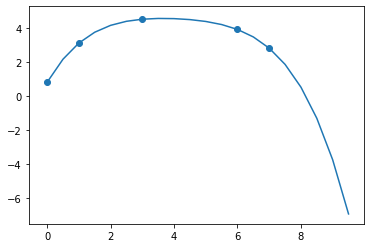

In [87]:
class NewtonInterpolation:
    def __init__(self, df):
        self.x_list = df['x']
        self.y_list = df['y']
        self.a = []
        w = self.y_list.copy()
        for i in range(len(self.x_list)):
            for j in reversed(range(i)):
                w[j] = (w[j+1] - w[j]) / (self.x_list[i] - self.x_list[j])
            self.a.append(w[0])

    def get_value(self, x):
        result = self.a[-1]
        for i in reversed(range(0, len(self.a)-1)):
            result = result * (x - self.x_list[i]) + self.a[i]
        return result

newton = NewtonInterpolation(df.copy())

data_newton = []
for x in np.arange(0, 10, 0.5):
    data_newton.append([x, newton.get_value(x)])
df_newton = pd.DataFrame(data=data_newton, columns=['x', 'y'])
plt.plot(df_newton['x'], df_newton['y'])
plt.scatter(df['x'], df['y'])
df_newton